In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
data = pd.read_csv("../data/estudiantes_pregrado.csv")
data

,Carrera,201710,201720,201810,201820,201910,201920,202010,202020,202110,202120
0,Administracion,985,989,989,1019,1020,1037,1058,1159,1202,1215
1,Ingenieria Ambiental,416,380,376,357,348,304,267,245,216,187
2,Ingenieria Electrica,123,113,122,120,115,121,110,99,85,83
3,Diseno,761,751,761,765,781,793,795,812,833,828
4,Narrativas Digitales,0,0,0,0,7,34,70,112,136,160
5,Gobierno y asuntos publicos,177,212,233,252,274,272,286,273,276,262
6,Ingenieria de sistemas,546,570,607,627,676,657,709,696,722,731
7,Lenguas y cultura,132,154,164,164,178,165,157,140,169,165
8,Biologia,254,249,231,230,234,230,228,212,198,190
9,Microbiologia,162,172,181,168,172,182,185,174,191,178


(0.0, 15.0)

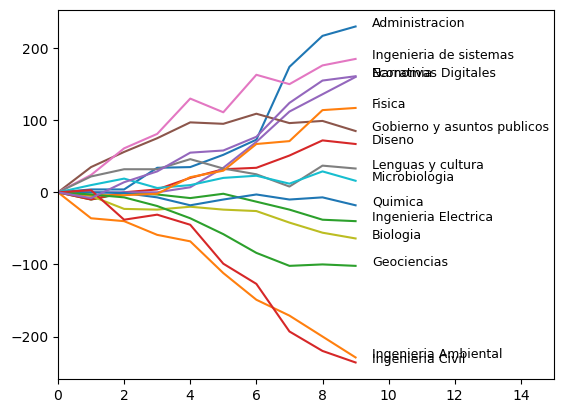

In [128]:
for i in range(len(data)):
    y = np.array(data.iloc[i][1:] - data.iloc[i][1])
    x = np.arange(len(y))
    plt.plot(x,y)
    plt.text(9.5,(data.iloc[i][-1] - data.iloc[i][1]), data.iloc[i][0], fontsize=9)
plt.xlim(0,15)

[]

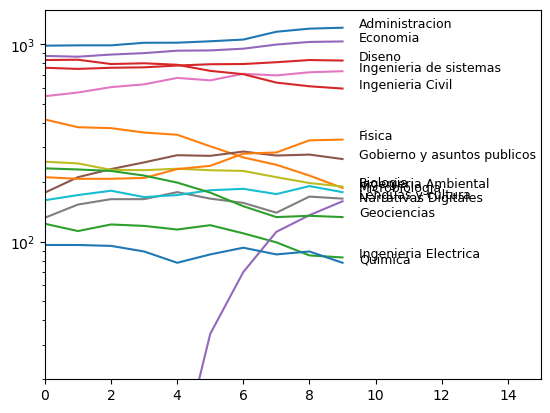

In [134]:
for i in range(len(data)):
    y = np.array(data.iloc[i][1:])
    x = np.arange(len(y))
    plt.plot(x,y)
    plt.text(9.5,(data.iloc[i][-1]), data.iloc[i][0], fontsize=9)
plt.xlim(0,15)
plt.ylim(20,1500)
plt.semilogy()

In [107]:
def find_a_v_from_data(x, y):
    a, b, c = np.polyfit(x, y, 2)
    max_t = len(x)-1
    v = 2*a*max_t + b
    #print(max_t)
    return a,v

def new_data_from_jackknife(x, y):
    n = len(x)
    ids = np.arange(n)
    new_ids = np.random.choice(ids, size=n)
    return x[new_ids], y[new_ids]

def estimate_a_v_with_uncertainty(x, y, N_iterations=100):
    a_values = np.zeros(N_iterations)
    v_values = np.zeros(N_iterations)
    for i in range(N_iterations):
        new_x, new_y = new_data_from_jackknife(x, y)
        a_values[i], v_values[i] = find_a_v_from_data(new_x, new_y)
    return a_values.mean(), v_values.mean()

In [109]:
for i in range(len(data)):
    y = np.array(np.float_(data.iloc[i][-9:]))
    x = np.arange(len(y))*1.0
    a, v = estimate_a_v_with_uncertainty(x, y)
    print(data.iloc[i][0], a, v)

Administracion 4.014941007287519 63.141002379856836
Ingenieria Ambiental -1.4333245987425471 -38.871469588803045
Ingenieria Electrica -1.1556455685359495 -14.329702645261634
Diseno 0.25076801490758116 12.651391447300364
Narrativas Digitales 3.0426618921982227 47.86734721521806
Gobierno y asuntos publicos -2.525175881459012 -13.802736844806343
Ingenieria de sistemas -1.5656437980432432 5.729788487095274
Lenguas y cultura 0.20024577855909148 -1.0270011731627344
Biologia -0.9020416378593358 -12.828870430360753
Microbiologia 0.006093710145787114 1.6419013926178405
Quimica 0.1545791245913878 0.7363973720107226
Fisica 1.5722784112458936 30.36343425442929
Geociencias 0.5118263916604314 -13.044822542803622
Ingenieria Civil -2.185389296424043 -51.46858956222816
Economia 1.018544732814276 29.702718326016726
